In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Lectura de datos

In [2]:
df = pd.read_csv('../datasets/user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


* Estadisticas descriptivas del dataset

In [3]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


* Comprobacion de datos nulos/faltantes/inconsistencias

In [ ]:
# Filas na

df.isna().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [ ]:
#Filas nulas

df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [ ]:
# Comprobacion de valores duplicados

df.duplicated().sum()

0

In [ ]:
# Cantidad de valores unicos por columna

df.nunique()

User ID                       700
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64

In [8]:
# Conteo de modelos

device_model_counts = df['Device Model'].value_counts()
device_model_counts

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

* Diccionario de datos
- User ID: Identificador único para cada usuario.
- Device Model: Modelo del smartphone del usuario.
- Operating System: El sistema operativo del dispositivo (iOS o Android).
- App Usage Time: Tiempo diario dedicado a aplicaciones móviles, medido en minutos.
- Screen On Time: Promedio de horas por día en que la pantalla está activa.
- Battery Drain: Consumo diario de batería en mAh.
- Number of Apps Installed: Total de aplicaciones disponibles en el dispositivo.
- Data Usage: Consumo diario de datos móviles en megabytes.
- Age: Edad del usuario.
- Gender: Género del usuario (Masculino o Femenino).
- User Behavior Class: Clasificación del comportamiento del usuario según patrones de uso (1 a 5).

* EDA

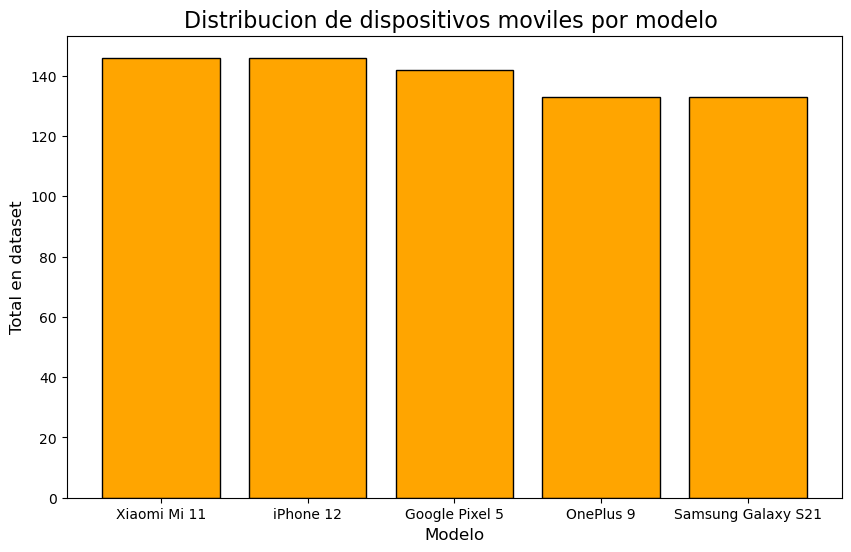

In [10]:
plt.figure(figsize=(10,6))
plt.bar(device_model_counts.index, device_model_counts.values, color='orange', edgecolor='black')

plt.title('Distribucion de dispositivos moviles por modelo ', fontsize=16)

plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Total en dataset', fontsize=12)

plt.show()

* Vemos que iphone y xiaomi son las marcas mas populares, seguidos muy de cerca por el google pixel

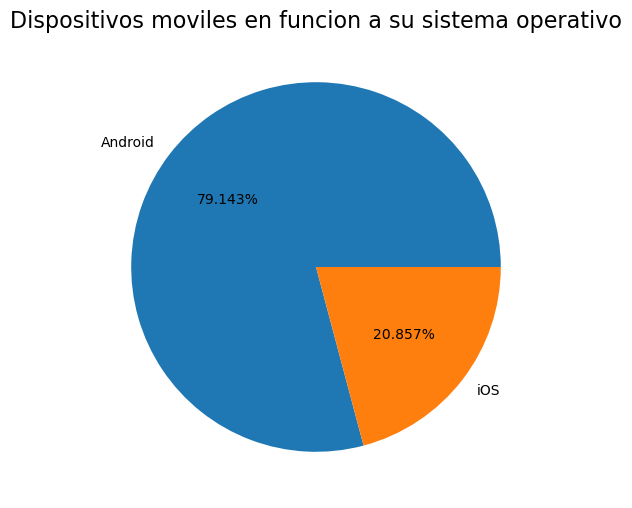

In [13]:
device_os_counts = df['Operating System'].value_counts()
device_os_counts

Android_counts = 554
iOS_counts = 146

index_values = [Android_counts, iOS_counts]
index_labels = ['Android', 'iOS']

plt.figure(figsize=(10,6))
plt.pie(index_values, labels = index_labels, autopct='%2.3f%%')

plt.title('Dispositivos moviles en funcion a su sistema operativo', fontsize=16)

plt.show()

* Conteo de variable operating system
* La distribucion de esta variable sugiere que android es mucho mas usado que ios, posiblemente por la mayor variedad de dispositivos que cargan este SO

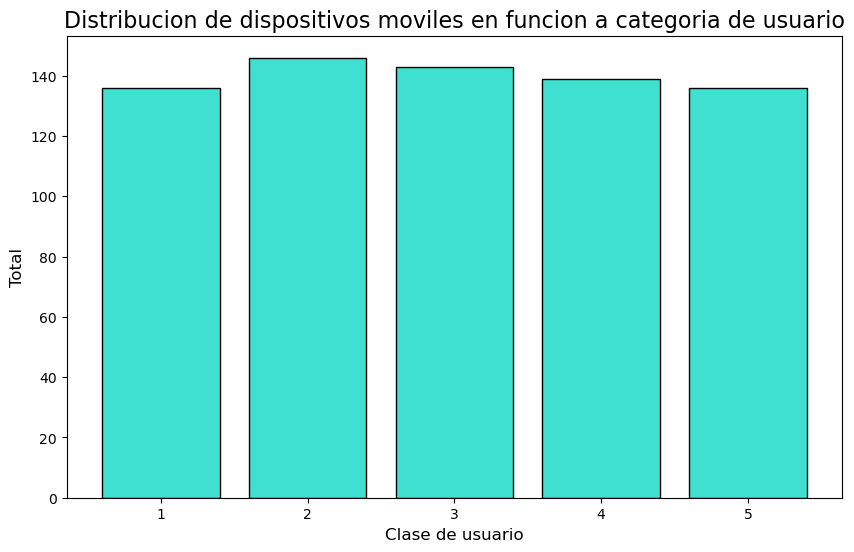

In [15]:
user_behavior_class_counts = df['User Behavior Class'].value_counts()
user_behavior_class_counts

plt.figure(figsize=(10,6))
plt.bar(user_behavior_class_counts.index, user_behavior_class_counts.values, color='turquoise', edgecolor='black')

plt.title('Distribucion de dispositivos moviles en funcion a categoria de usuario', fontsize=16)

plt.xlabel('Clase de usuario', fontsize=12)
plt.ylabel('Total', fontsize=12)

plt.show()

* Observamos que los usuarios casuales (nivel 2) son los mas comunes, pero entre todas las categorias mantienen una variacion minima, estando muy cerca unos de otros

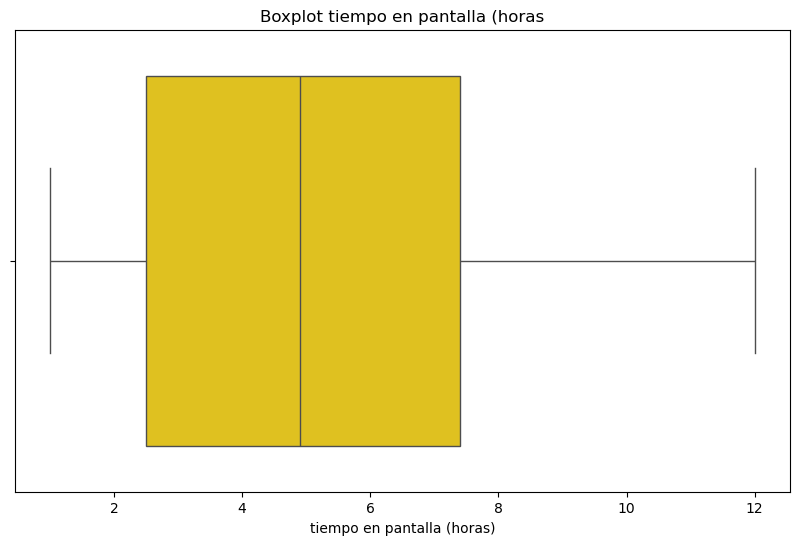

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Screen On Time (hours/day)'], color='gold')
plt.title('Boxplot tiempo en pantalla (horas')
plt.xlabel('tiempo en pantalla (horas)')
plt.show()

* Se observan que los datos se rigen sobre la media, siendo esta de 5 horas y media en promedio

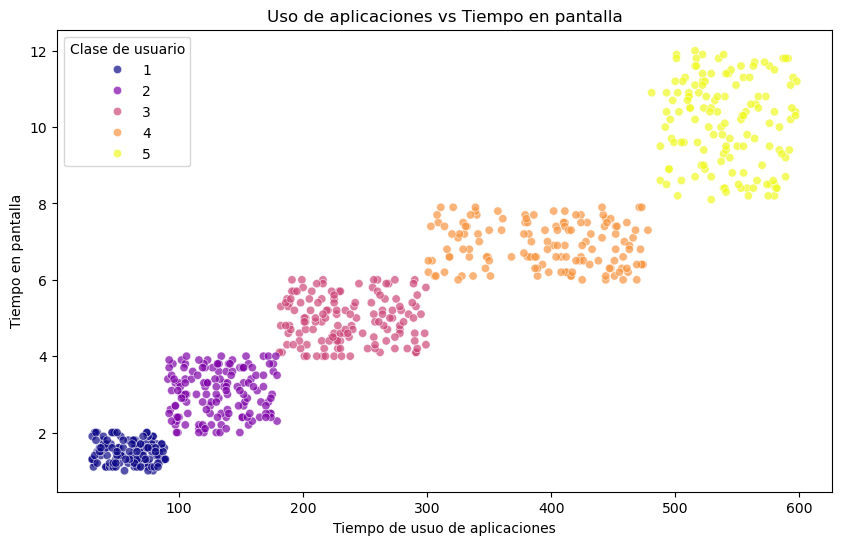

In [18]:
df.columns = df.columns.str.strip()
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='App Usage Time (min/day)', 
    y='Screen On Time (hours/day)', 
    hue='User Behavior Class', 
    palette='plasma', 
    alpha=0.7
)
plt.title('Uso de aplicaciones vs Tiempo en pantalla')
plt.xlabel('Tiempo de usuo de aplicaciones')
plt.ylabel('Tiempo en pantalla')
plt.legend(title='Clase de usuario')
plt.show()

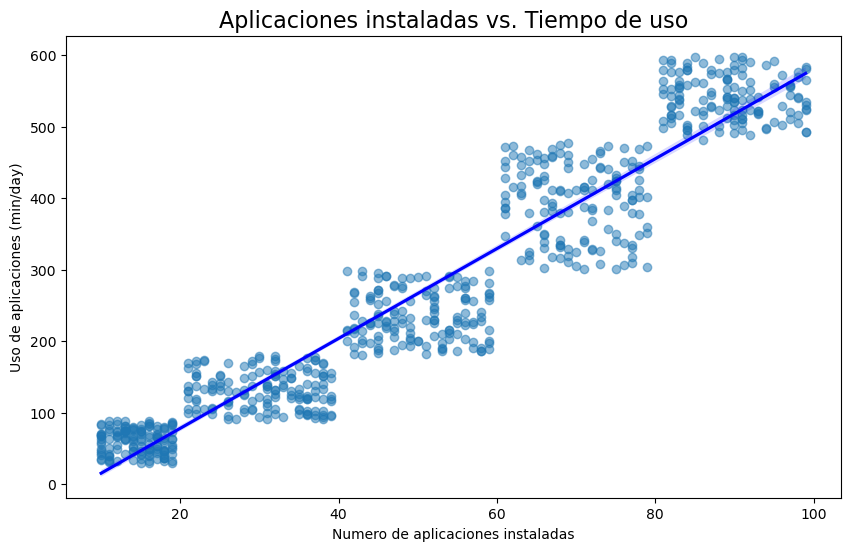

In [19]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Number of Apps Installed', y='App Usage Time (min/day)', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title('Aplicaciones instaladas vs. Tiempo de uso', fontsize=16)
plt.xlabel('Numero de aplicaciones instaladas')
plt.ylabel('Uso de aplicaciones (min/day)')
plt.show()

* Se observa que a medida que incrementa la cantidad de aplicaciones instaladas aumenta el tiempo en pantalla, pero tambien los datos parecen dispersarse mas a medida que aumenta la cantidad de aplicaciones, el punto mas notorio es a partir de las 50 aplicaciones

C:\Users\Ivan\AppData\Local\Temp\ipykernel_15376\2712876894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Operating System', y='App Usage Time (min/day)', data=df, palette='Set1')


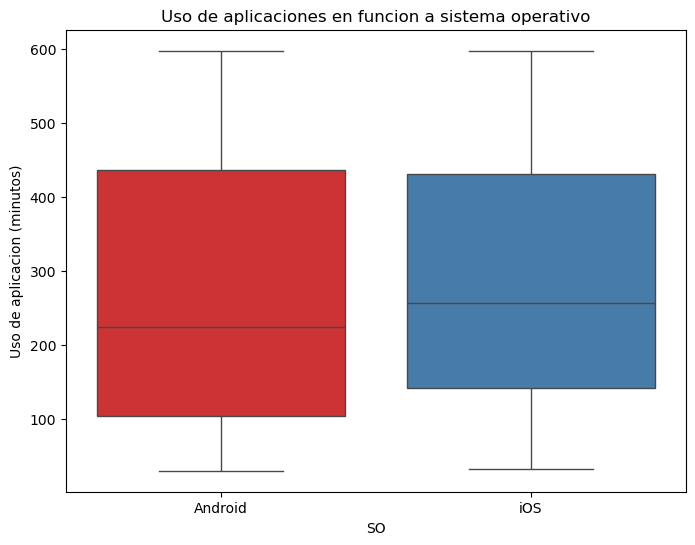

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Operating System', y='App Usage Time (min/day)', data=df, palette='Set1')
plt.title('Uso de aplicaciones en funcion a sistema operativo')
plt.xlabel('SO')
plt.ylabel('Uso de aplicacion (minutos)')
plt.show()

* Se observa que los usuarios de Android tienden a pasar mas tiempo en sus telefonos debido a tener mas variedad de aplicaciones en su tienda, ademas se observaque  

C:\Users\Ivan\AppData\Local\Temp\ipykernel_15376\3795005583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='User Behavior Class', y='Data Usage (MB/day)', data=df, palette='magma')


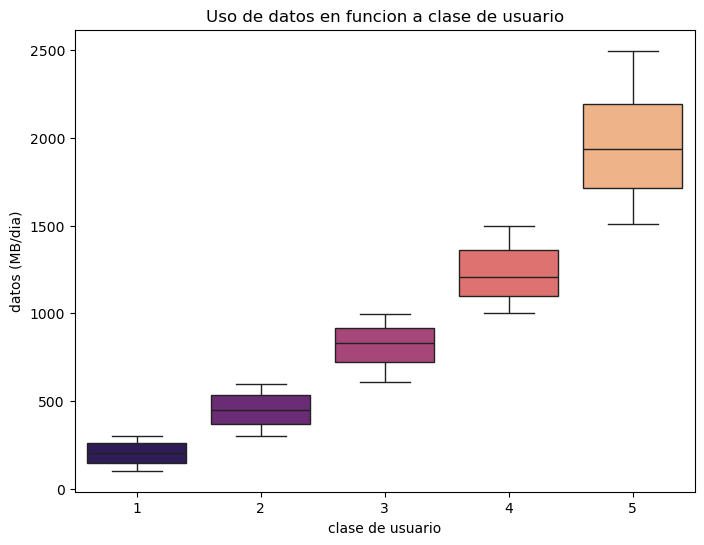

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='User Behavior Class', y='Data Usage (MB/day)', data=df, palette='magma')
plt.title('Uso de datos en funcion a clase de usuario')
plt.xlabel('clase de usuario')
plt.ylabel('datos (MB/dia)')
plt.show()

* Se observa que mientras la clase de usuario aumenta mas datos consume, es decir, el uso de datos esta ligado directamente al tipo de usuario, mientras use para mas cosas (niveles mas altos) mas datos consumira por dia

C:\Users\Ivan\AppData\Local\Temp\ipykernel_15376\485736212.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Screen On Time (hours/day)', data=df, palette='Set1', ci=None)
C:\Users\Ivan\AppData\Local\Temp\ipykernel_15376\485736212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Screen On Time (hours/day)', data=df, palette='Set1', ci=None)


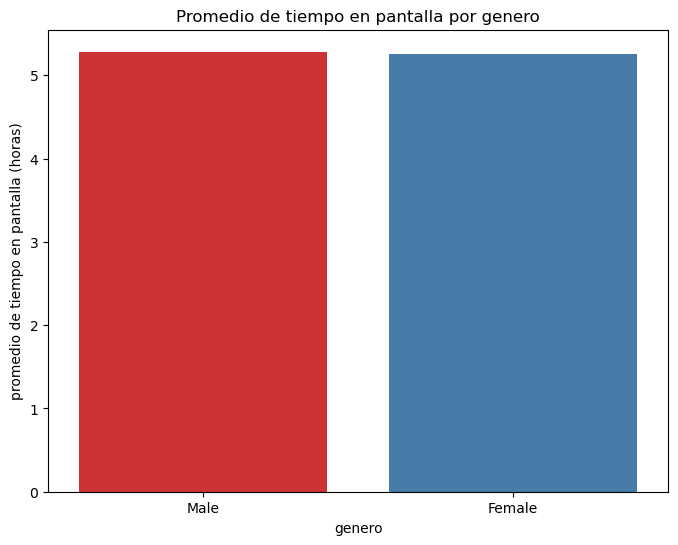

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Screen On Time (hours/day)', data=df, palette='Set1', ci=None)
plt.title('Promedio de tiempo en pantalla por genero')
plt.xlabel('genero')
plt.ylabel('promedio de tiempo en pantalla (horas)')
plt.show()

* Practicamente no existe diferencia apreciable entre el tiempo en pantalla y el genero

* Matriz de Correlacion

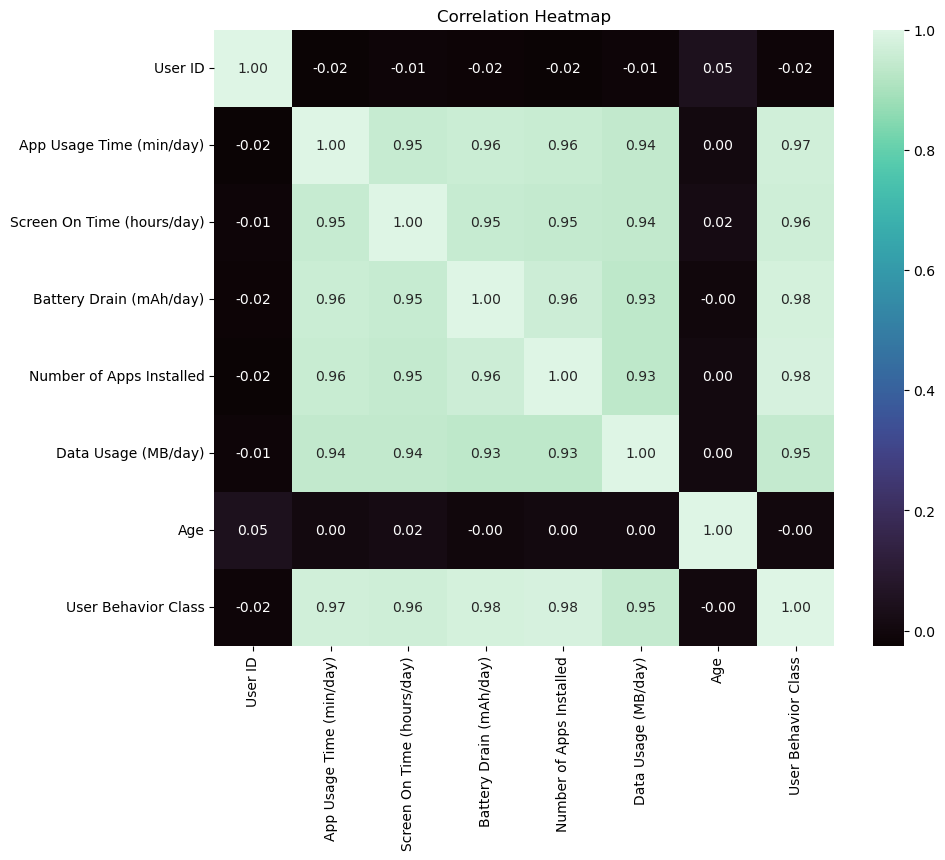

In [24]:
plt.figure(figsize=(10,8))
corr_matrix = df.drop(columns=['Operating System', 'Device Model', 'Gender']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='mako', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

* Se observa una correlacion muy fuerte entre el tiempo en pantalla y la cantidad de tiempo en una aplicacion, asi como con la clase de usuario y la cantidad de datos usadas por dia
* Ademas, se ven muchas correlaciones fuertes

* Caracteristicas y desafios
 - Este dataset se caracteriza por la buena correlacion que existe entre sus datos, todos estan ligados entre ellos, lo que hace que el analisis EDA sea mas sencillo y facil de explicar
 - Debido a que los datos estan muy correlacionados entre si, un desafio podria ser predecir a que categoria pertenece un usuario, teniendo en cuenta los demas datos 